In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [3]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Pollution')
    plt.plot(predicted, color='blue',label='Predicted Pollution')
    plt.title('Pollution Prediction')
    plt.xlabel('Time')
    plt.ylabel('Pollution')
    plt.legend()
    plt.show()

In [4]:
dataset = pd.read_csv('LSTM-Multivariate_pollution.csv', index_col='date', parse_dates=['date'])
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [5]:
training_set = dataset['2012-12-31':'2014-06-30'].iloc[:,0:1].values
test_set = dataset['2014-12-01':].iloc[:,0:1].values

In [7]:
test_set.shape

(744, 1)

In [8]:
training_set.shape

(13128, 1)

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled.shape

(13128, 1)

In [12]:
X_train = []
y_train = []
for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [14]:
X_train.shape

(13068, 60, 1)

In [15]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
409/409 [==============================] - 24s 47ms/step - loss: 0.0052
Epoch 2/20
409/409 [==============================] - 19s 46ms/step - loss: 0.0031
Epoch 3/20
409/409 [==============================] - 19s 47ms/step - loss: 0.0024
Epoch 4/20
409/409 [==============================] - 20s 48ms/step - loss: 0.0021
Epoch 5/20
409/409 [==============================] - 19s 46ms/step - loss: 0.0019
Epoch 6/20
409/409 [==============================] - 19s 48ms/step - loss: 0.0017
Epoch 7/20
409/409 [==============================] - 20s 49ms/step - loss: 0.0016
Epoch 8/20
409/409 [==============================] - 19s 46ms/step - loss: 0.0016
Epoch 9/20
409/409 [==============================] - 19s 46ms/step - loss: 0.0015
Epoch 10/20
409/409 [==============================] - 19s 48ms/step - loss: 0.0014
Epoch 11/20
409/409 [==============================] - 19s 47ms/step - loss: 0.0014
Epoch 12/20
409/409 [==============================] - 19s 46ms/step - loss: 0.0013
E

In [17]:
dataset_total = pd.concat((dataset["pollution"]['2014-01-01':'2014-09-30'],dataset["pollution"]['2014-09-30':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [23]:
X_test = []
for i in range(60,test_set.shape[0]+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_pollution = regressor.predict(X_test)
predicted_pollution = sc.inverse_transform(predicted_stock_price)

24/24 [==============================] - 0s 14ms/step


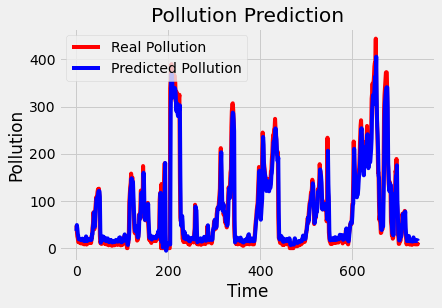

In [24]:
plot_predictions(test_set,predicted_stock_price)

From the above fig. , we can understand predicted pollution is approx. close to real pollution value.